Representation

![](banner_project.jpg)

In [1]:
analyst = "Lilit Petrosyan"

In [2]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)
options(repr.matrix.max.rows=674)
options(repr.matrix.max.cols=200)
update_geom_defaults("point", list(size=1))                                

.................................................... start of document ....................................................

### Approach

Retrieve a public company fundamentals dataset comprising thousands of US companies from quarters 1, 2, 3, and 4 of year 2017 + company stock price data for those companies from quarter 4 of year 2018.

Transform the dataset representation to capture all information about any single company in a single observation.

Additionally transform the dataset representation using variable filtration, imputation, principal component analysis, and other methods.

### Data Source

The data includes these files:

* Data Dictionary.csv
* Company Fundamentals 2017.csv
* Company Fundamentals 2018.csv

The dataset and accompanying data dictionary was sourced from ...

* Wharton Research Data Services > Compustat - Capital IQ from Standard & Poor's > North America - Daily > Fundamentals Quarterly (https://wrds-www.wharton.upenn.edu/)

  * Date Variable: Data Date
  * Date Range: 2017-01 to 2017-12 -or- 2018-01 to 2018-12
  * Company Codes: Search the entire database
    * Consolidtaion Level: C, Output
    * Industry Format: INDL, FS, Output
    * Data Format: STD, Output
    * Population Source: D, Output
    * Quarter Type: Fiscal View, Output
    * Currency: USD, Output (not CAD)
    * Company Status: Active, Output (not Inactive)
  * Variable Types: Data Items, Select All (674)
  * Query output:
    * Output format: comma-delimited text
    * Compression type: None
    * Data format: MMDDYY10

The dataset is restricted to select US active, publicly held companies that reported quarterly measures including stock prices for 1st, 2nd, 3rd, and 4th quarters in years 2017 and 2018.  All non-missing stock prices exceed $3 per share.  File formats are all comma-separated values (CSV).

The data dictionary is from Variable Descriptions tab, copied to Excel, saved in csv format.


## Data

In [3]:
threshold = 0.30

In [4]:
# Current Year
threshold = 0.30
datax = read.csv("Company Fundamentals 2017.csv", header=TRUE)

datax$quarter = quarter(mdy(datax[,2]))

data.current.q1 = datax[(datax$quarter==1) & !is.na(datax$prccq) & (datax$prccq>=3), -ncol(datax)]
data.current.q2 = datax[(datax$quarter==2) & !is.na(datax$prccq) & (datax$prccq>=3), -ncol(datax)]
data.current.q3 = datax[(datax$quarter==3) & !is.na(datax$prccq) & (datax$prccq>=3), -ncol(datax)]
data.current.q4 = datax[(datax$quarter==4) & !is.na(datax$prccq) & (datax$prccq>=3), -ncol(datax)]

data.current.q1 = data.current.q1[!duplicated(data.current.q1$gvkey),]
data.current.q2 = data.current.q2[!duplicated(data.current.q2$gvkey),]
data.current.q3 = data.current.q3[!duplicated(data.current.q3$gvkey),]
data.current.q4 = data.current.q4[!duplicated(data.current.q4$gvkey),]

colnames(data.current.q1)[-c(1, 10, 12)] = paste0(colnames(data.current.q1)[-c(1, 10, 12)], ".q1")
colnames(data.current.q2)[-c(1, 10, 12)] = paste0(colnames(data.current.q2)[-c(1, 10, 12)], ".q2")
colnames(data.current.q3)[-c(1, 10, 12)] = paste0(colnames(data.current.q3)[-c(1, 10, 12)], ".q3")
colnames(data.current.q4)[-c(1, 10, 12)] = paste0(colnames(data.current.q4)[-c(1, 10, 12)], ".q4")

m12 = merge(data.current.q1, data.current.q2, by=c("gvkey", "tic", "conm"), all=TRUE)
m34 = merge(data.current.q3, data.current.q4, by=c("gvkey", "tic", "conm"), all=TRUE)
data.current = merge(m12, m34, by=c("gvkey", "tic", "conm"), all=TRUE, sort=TRUE)

data.current = data.current[!is.na(data.current$prccq.q4),]


# Next Year

datax = read.csv("Company Fundamentals 2018.csv", header=TRUE)

datax$quarter = quarter(mdy(datax[,2]))
data.future.q4 = datax[(datax$quarter==4) & !is.na(datax$prccq), c("gvkey", "prccq")]
data.future.q4 = data.future.q4[!duplicated(data.future.q4$gvkey),]


# Consolidated Current Year / Next Year

data = merge(data.current, data.future.q4, by="gvkey", all=FALSE)

data$growth = (data$prccq - data$prccq.q4) / data$prccq.q4
data$big_growth = factor(data$growth >= threshold, levels=c(FALSE, TRUE), labels=c("NO", "YES"))


# Present a few rows ...

data[1:3,]
size(data)

gvkey,tic,conm,datadate.q1,fyearq.q1,fqtr.q1,fyr.q1,indfmt.q1,consol.q1,popsrc.q1,datafmt.q1,cusip.q1,acctchgq.q1,acctstdq.q1,adrrq.q1,ajexq.q1,ajpq.q1,bsprq.q1,compstq.q1,curcdq.q1,curncdq.q1,currtrq.q1,curuscnq.q1,datacqtr.q1,datafqtr.q1,finalq.q1,ogmq.q1,rp.q1,scfq.q1,srcq.q1,staltq.q1,updq.q1,apdedateq.q1,fdateq.q1,pdateq.q1,rdq.q1,acchgq.q1,acomincq.q1,acoq.q1,actq.q1,altoq.q1,ancq.q1,anoq.q1,aociderglq.q1,aociotherq.q1,aocipenq.q1,aocisecglq.q1,aol2q.q1,aoq.q1,apq.q1,aqaq.q1,aqdq.q1,aqepsq.q1,aqpl1q.q1,aqpq.q1,arcedq.q1,arceepsq.q1,arceq.q1,atq.q1,aul3q.q1,billexceq.q1,capr1q.q1,capr2q.q1,capr3q.q1,capsftq.q1,capsq.q1,ceiexbillq.q1,ceqq.q1,cheq.q1,chq.q1,cibegniq.q1,cicurrq.q1,ciderglq.q1,cimiiq.q1,ciotherq.q1,cipenq.q1,ciq.q1,cisecglq.q1,citotalq.q1,cogsq.q1,csh12q.q1,cshfd12.q1,cshfdq.q1,cshiq.q1,cshopq.q1,cshoq.q1,cshprq.q1,cstkcvq.q1,cstkeq.q1,cstkq.q1,dcomq.q1,dd1q.q1,deracq.q1,deraltq.q1,derhedglq.q1,derlcq.q1,derlltq.q1,diladq.q1,dilavq.q1,dlcq.q1,⋯,stkcpay.q4,tdcy.q4,tfvcey.q4,tiey.q4,tiiy.q4,tsafcy.q4,txachy.q4,txbcofy.q4,txbcoy.q4,txdcy.q4,txdiy.q4,txpdy.q4,txty.q4,txwy.q4,uaolochy.q4,udfccy.q4,udvpy.q4,ufretsdy.q4,ugiy.q4,uniamiy.q4,unopincy.q4,unwccy.q4,uoisy.q4,updvpy.q4,uptacy.q4,uspiy.q4,ustdncy.q4,usubdvpy.q4,utfdocy.q4,utfoscy.q4,utmey.q4,uwkcapcy.q4,wcapchy.q4,wcapcy.q4,wday.q4,wddy.q4,wdepsy.q4,wdpy.q4,xidocy.q4,xidoy.q4,xinty.q4,xiy.q4,xopry.q4,xoptdqpy.q4,xoptdy.q4,xoptepsqpy.q4,xoptepsy.q4,xoptqpy.q4,xopty.q4,xrdy.q4,xsgay.q4,exchg.q4,cik.q4,costat.q4,fic.q4,cshtrq.q4,dvpspq.q4,dvpsxq.q4,mkvaltq.q4,prccq.q4,prchq.q4,prclq.q4,adjex.q4,add1.q4,add2.q4,add3.q4,add4.q4,addzip.q4,busdesc.q4,city.q4,conml.q4,county.q4,dlrsn.q4,ein.q4,fax.q4,fyrc.q4,ggroup.q4,gind.q4,gsector.q4,gsubind.q4,idbflag.q4,incorp.q4,loc.q4,naics.q4,phone.q4,prican.q4,prirow.q4,priusa.q4,sic.q4,spcindcd.q4,spcseccd.q4,spcsrc.q4,state.q4,stko.q4,weburl.q4,dldte.q4,ipodate.q4,prccq,growth,big_growth
1004,AIR,AAR CORP,02/28/2017,2016,3,5,INDL,C,D,STD,000361105,,DS,NA,1,1,,AZ,USD,USD,1,NA,2017Q1,2016Q3,Y,,Q,7,5,,3,02/28/2017,03/23/2017,03/21/2017,03/21/2017,0,-46.400,28.000,893.100,90.500,609.000,NA,0.000,0,-42.500,0,NA,248.500,194.600,NA,NA,NA,NA,NA,NA,NA,NA,1502.100,NA,NA,NA,NA,NA,NA,457.300,NA,885.700,10.100,10.100,13.700,-0.200,0.000,0,0,0.3,13.800,0,13.800,340.70,33.9250,34.2750,34.200,45.170,0.052,34.324,33.700,1.00,-0.1,45.200,0,2.000,NA,NA,NA,NA,NA,0,14.300,2.000,⋯,NA,NA,NA,NA,NA,NA,NA,0,0,-22.100,NA,14.700,11.200,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,-1.2,-36.2,3.600,0,758.700,NA,NA,NA,NA,NA,NA,NA,93.300,11,1750,A,USA,13354306,0.075,0.075,1444.0318,41.58,41.940,34.25,1,"One AAR Place, 1100 North Wood Dale Road",,,NA,60191,"AAR Corp. provides products and services to commercial aviation, government, and defense markets worldwide. The company operates in two segments, Aviation Services and Expeditionary Services.",Wood Dale,AAR Corp,,NA,36-2334820,630-227-2039,5,2010,201010,20,20101010,D,DE,USA,423860,630-227-2000,,,1,5080,110,925,B,IL,0,www.aarcorp.com,NA,01/01/1988,43.69,0.05074555,NO
1045,AAL,AMERICAN AIRLINES GROUP INC,03/31/2017,2017,1,12,INDL,C,D,STD,02376R102,,DS,NA,1,1,,AC,USD,USD,1,NA,2017Q1,2017Q1,Y,,Q,7,5,,3,03/31/2017,04/27/2017,,04/27/2017,0,-5097.000,856.000,10626.000,3383.000,42001.000,0,0.000,-669,-4428.000,0,6145,9710.000,1882.000,NA,NA,NA,700,NA,NA,NA,NA,52627.000,0,NA,NA,NA,NA,NA,6726.000,NA,3457.000,7219.000,374.000,340.000,0.000,0.000,0,0,-14.0,326.000,0,326.000,6774.00,526.7220,530.1763,507.797,495.750,11.677,495.750,503.902,0.01,0.0,5.000,0,1714.000,NA,NA,NA,NA,NA,0,340.000,1714.000,⋯,NA,NA,NA,NA,NA,NA,0.000,0,0,1141.000,2089.000,20.000,2113.000,0,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,0.0,0.0,1102.000,0,35640.000,NA,NA,NA,NA,NA,NA,NA,7240.000,14,6201,A,USA,270496454,0.100,0.100,24740.6812,52.03,53.740,45.27,1,1 Skyview Drive,,,NA,76155,"American Airlines Group Inc., through its subsidiaries, operates as a network air carrier. It provide

observations,variables
4305,2714


In [5]:
# Identifying which variables can later be used as
# outcome variables and which can be used as predictor variables.

outvars = c("prccq", "growth", "big_growth")
prevars = setdiff(colnames(data), outvars)
layout(fmt(outvars), fmt(prevars[1:10], "prevars (first few)"))

outvars
prccq
growth
big_growth
prevars (first few)
gvkey
tic
conm
datadate.q1
fyearq.q1
fqtr.q1


## Transform Representation of Data

This is the process of cleaning the data to have a more defind data set, and have more accuracy in our predictions. We remove all variables that have more than 20% missing data, for the remainning missing data, we use the method of imputating data by butting the mean of the numeric variables for the missing numeric values, and the median for the character values. To apply PCA methods, we filter the numeric values. PCA helps us normalize the data, to avoid having large scale data. By visualizing the varience of each principal variable, we are able to see the variables with varying values. By later comparing PC2 and PC2 using a scatter plot, it hels us see their relation to the growth variable, as we were able to see that PC1 and PC2 fit with the values of big_growth.

### Variable Filtration

In [6]:
# Filtering the data to include only predictor variables with at least 80% non-missing values. 
cn=colnames(data)
filter = subset(data, select=-c(prccq, growth, big_growth))
predat=filter[, which(colMeans(!is.na(filter)) > 0.8)]
fmt(size(predat), "data after variable filtration")

observations,variables
4305,923


### Imputation

In [7]:
# Impute missing data:
# for each numeric variable, using the mean of non-missing values;
# for each non-numeric variable, using the mode of non-missing values.
newd=impute(predat)
ml= mean(as.matrix(unlist(lapply(predat, is.numeric))  ), na.rm=TRUE)
fmt(size(newd), "data after imputation")

observations,variables
4305,923


### Principal Component Analysis

In [8]:
# For principal component analysis, filter the data to include only numeric and integer variables with non-zero variance.
library("dplyr")
n=select_if(newd, is.numeric)
fmt(size(n), "data with only numeric and integer variables")
datax = n[, var_info.var(n) != 0]
fmt(size(datax), "data after removing zero-variance variables")

observations,variables
4305,745


observations,variables
4305,737


In [9]:
# Performing a principal component analysis on the numeric and integer variables with non-zero variance
pc = prcomp(datax, scale=TRUE, retx=TRUE)
data.pc = as.data.frame(pc$x)
data.pc[1:5,]

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,⋯,PC638,PC639,PC640,PC641,PC642,PC643,PC644,PC645,PC646,PC647,PC648,PC649,PC650,PC651,PC652,PC653,PC654,PC655,PC656,PC657,PC658,PC659,PC660,PC661,PC662,PC663,PC664,PC665,PC666,PC667,PC668,PC669,PC670,PC671,PC672,PC673,PC674,PC675,PC676,PC677,PC678,PC679,PC680,PC681,PC682,PC683,PC684,PC685,PC686,PC687,PC688,PC689,PC690,PC691,PC692,PC693,PC694,PC695,PC696,PC697,PC698,PC699,PC700,PC701,PC702,PC703,PC704,PC705,PC706,PC707,PC708,PC709,PC710,PC711,PC712,PC713,PC714,PC715,PC716,PC717,PC718,PC719,PC720,PC721,PC722,PC723,PC724,PC725,PC726,PC727,PC728,PC729,PC730,PC731,PC732,PC733,PC734,PC735,PC736,PC737
3.437123,-0.2260719,0.4220180,-0.6326422,1.5550509,-0.5650989,2.0762355,-4.7809366,2.57837534,1.0834382,-1.0852790,-0.7351277,0.2918953,6.8480433,-1.3871612,1.1200720,0.2210991,0.9914828,-0.79834108,0.20001133,-0.31771792,1.0539380,1.67813281,-0.8672219,-0.37905631,-1.16129629,1.0867702,-1.0412642,0.8547673,-0.1336883,-0.9056983,0.2780267,-0.72462144,-0.018625133,-1.0475663,0.37038314,0.09388485,1.00864500,-0.6290530,0.56007039,-0.13098834,0.52265832,-1.7038187,2.7211571,-0.34390112,0.22785908,-0.09971139,-0.57797892,-0.2903603,0.21928328,-0.47636356,-0.1945795,-0.05066614,-0.07005866,0.4389614,-0.2723389,-0.099977768,-0.315330206,-0.6652111,0.59191807,0.48702283,0.3472954,-0.29551715,-0.284412824,0.40647730,-0.15538404,0.05869476,0.58074474,0.23229255,-0.97475993,0.2748880,1.47194389,-0.26981678,-0.858540100,1.0660820,-1.48377211,-2.216605696,-2.06770952,-4.03616804,-0.75023659,-3.81854383,-1.856007787,1.59975313,-0.66278074,-2.4257545,0.81083565,-0.005509483,1.9140389,-1.64882918,-0.59361913,0.3067276,1.62462093,-0.2865575,0.20572160,0.14645964,0.44112856,0.12338222,-0.9757801,-0.1121492,-0.46611931,⋯,0.00027983357,-0.00023090758,0.0004433358,0.00008563764,0.00022746862,-0.00007650780,0.00002915370,0.00007547395,-0.00015238488,-0.00014919475,-0.00002906592,0.000043237916,0.000312392577,0.00029691890,0.00015236885,0.000148090698,-0.000161156023,-0.00003421426,0.00028855696,0.000154113664,-0.000162176478,-0.00028822508,-0.000101330149,-0.00004300331,0.00032482558,0.000082546432,-0.000009533542,-0.000021616792,0.00020739534,-0.000044487222,-0.000085922027,0.000004819613,-0.000190430166,-0.000036292968,-0.00006708483,-0.00006753966,0.000176456586,-0.000033321117,0.000030015022,-0.000012817335,0.000006835853,-0.0000124378999,-0.000014797566,-0.0000082422385,0.0000147049155,-0.0000114649924,-0.0000023735536,0.0000155901469,-0.0000091170143,0.0000056229947,-0.000008896972,0.0000074087280,-0.0000020323700,-0.0000041194253,-0.0000020283956,-0.00000096241526,-0.0000030301529,-0.00000012171873,-0.00000065892935,-0.000000025429233,-0.00000001472213,-0.000000001709996,-0.0000000174902813,0.000000003685459,-0.0000000000371691892,3.455461e-15,1.155109e-15,-2.504507e-16,-3.478663e-16,1.499452e-15,6.433656e-16,-5.169476e-16,-3.599551e-16,-2.428613e-16,7.502679e-16,4.361203e-16,8.686628e-16,5.126108e-16,4.380177e-17,7.840950e-16,1.170938e-16,4.015885e-16,-2.081668e-17,1.092876e-15,1.465841e-15,-4.423545e-17,-2.053913e-15,4.544976e-16,3.582204e-16,4.649059e-16,-1.491862e-16,-5.521842e-16,8.478461e-16,1.257675e-16,-6.956241e-16,-3.263449e-17,-1.875128e-16,-1.734723e-18,3.599551e-17,-2.099015e-16
-12.033207,0.8045109,5.9180179,-0.8018754,6.7210451,-3.0447560,0.3546613,-0.9115091,-0.08658059,-3.1130875,-2.0981728,-0.6351669,2.3283523,-1.9116502,0.3221275,0.7248502,-0.7006368,0.6671353,-0.97108690,0.17976843,-1.29237646,1.3577810,0.94279445,1.0363612,0.75825338,-0.11103292,0

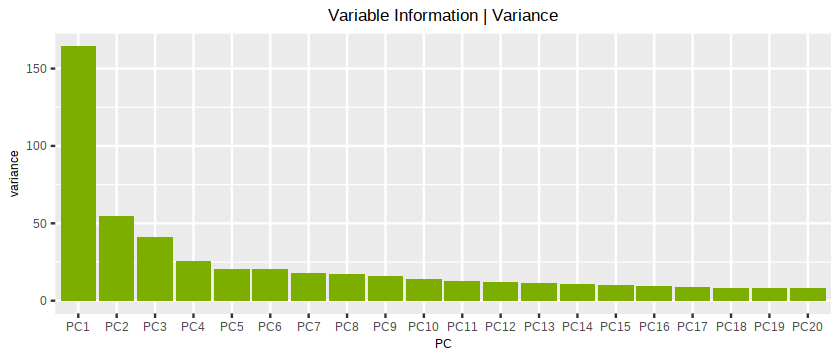

In [10]:
# Bar chart to visualize the variance of the first 20 principal components.
variable = c("PC1", "PC2", "PC3" ,"PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12", "PC13", "PC14", "PC15", "PC16", "PC17", "PC18", "PC19", "PC20")
variance = c(var(data.pc$PC1), var(data.pc$PC2), var(data.pc$PC3),var(data.pc$PC4), var(data.pc$PC5), var(data.pc$PC6),var(data.pc$PC7), var(data.pc$PC8), var(data.pc$PC9), var(data.pc$PC10), var(data.pc$PC11), var(data.pc$PC12), var(data.pc$PC13),var(data.pc$PC14), var(data.pc$PC15), var(data.pc$PC16),var(data.pc$PC17), var(data.pc$PC18), var(data.pc$PC19), var(data.pc$PC20))
tab=data.frame(variable, variance)
ggplot(tab) + geom_col(aes(x=sortby(variable, variance, decreasing=TRUE), y=variance)) +ggtitle("Variable Information | Variance") +
  xlab("PC") +
theme.no_legend


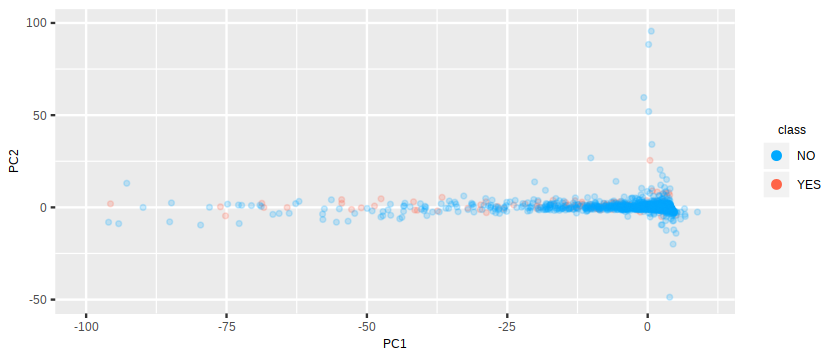

In [11]:
# 2D scatterplot to visualize PC1 vs PC2 vs big_growth
inactive.good = which(data$big_growth=='YES')
inactive.bad = which(data$big_growth=='NO')
class = c( rep("YES", length(inactive.good)),rep("NO", length(inactive.bad)))
ggplot(data.pc) + xlim(-100,10) + ylim(-50,100) +
geom_point(aes(x=PC1, y=PC2, color=class), alpha=0.2, na.rm=TRUE) + 
scale_color_manual(values=PALETTE[1:3]) + guides.standard + theme.legend_title

### Transform the Data

In [12]:
data=data.frame(gvkey=data$gvkey, tic=data$tic, conm=data$conm, PC1=data.pc$PC1, PC2=data.pc$PC2,prccq=data$prccq, growth=data$growth, big_growth=data$big_growth)
data[1:3,]

gvkey,tic,conm,PC1,PC2,prccq,growth,big_growth
1004,AIR,AAR CORP,3.437123,-0.2260719,43.69,0.05074555,NO
1045,AAL,AMERICAN AIRLINES GROUP INC,-12.033207,0.8045109,32.11,-0.38285604,NO
1050,CECE,CECO ENVIRONMENTAL CORP,3.953223,-0.7553386,6.75,0.31578947,YES


In [13]:
# Change the representation of the data:
#   The first 3 columns are gvkey, tic, and conm
#   The next 2 columns are PC1 and PC2
#   The next 3 columns are prccq, growth, and big_growth
# Keep the variable names of the predictor variables for later use.
# Keep the variable names of the outcome variables for later use.
d2=data.frame(gvkey=data$gvkey, tic=data$tic, conm=data$conm)
d3=data.frame(prccq=data$prccq, growth=data$growth, big_growth=data$big_growth)
d1=cbind(d2, data.pc, d3)
size(data)
outvars = c("tic", "conm", "big_growth")
prevars = setdiff(colnames(data), outvars)
data.frame(length(prevars),length(outvars))
d1[1:6,]

observations,variables
4305,8


length.prevars.,length.outvars.
5,3


gvkey,tic,conm,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,⋯,PC641,PC642,PC643,PC644,PC645,PC646,PC647,PC648,PC649,PC650,PC651,PC652,PC653,PC654,PC655,PC656,PC657,PC658,PC659,PC660,PC661,PC662,PC663,PC664,PC665,PC666,PC667,PC668,PC669,PC670,PC671,PC672,PC673,PC674,PC675,PC676,PC677,PC678,PC679,PC680,PC681,PC682,PC683,PC684,PC685,PC686,PC687,PC688,PC689,PC690,PC691,PC692,PC693,PC694,PC695,PC696,PC697,PC698,PC699,PC700,PC701,PC702,PC703,PC704,PC705,PC706,PC707,PC708,PC709,PC710,PC711,PC712,PC713,PC714,PC715,PC716,PC717,PC718,PC719,PC720,PC721,PC722,PC723,PC724,PC725,PC726,PC727,PC728,PC729,PC730,PC731,PC732,PC733,PC734,PC735,PC736,PC737,prccq,growth,big_growth
1004,AIR,AAR CORP,3.4371231,-0.2260719,0.4220180,-0.6326422,1.5550509,-0.5650989,2.0762355,-4.7809366,2.57837534,1.08343819,-1.0852790,-0.7351277,0.2918953,6.8480433,-1.3871612,1.1200720,0.2210991,0.9914828,-0.79834108,0.20001133,-0.31771792,1.0539380,1.67813281,-0.8672219,-0.37905631,-1.16129629,1.0867702,-1.0412642,0.8547673,-0.1336883,-0.9056983,0.2780267,-0.72462144,-0.018625133,-1.0475663,0.37038314,0.09388485,1.00864500,-0.6290530,0.56007039,-0.13098834,0.52265832,-1.7038187,2.7211571,-0.34390112,0.227859079,-0.09971139,-0.57797892,-0.29036026,0.21928328,-0.47636356,-0.1945795,-0.05066614,-0.07005866,0.4389614,-0.2723389,-0.099977768,-0.315330206,-0.6652111,0.59191807,0.48702283,0.34729539,-0.29551715,-0.284412824,0.40647730,-0.15538404,0.05869476,0.58074474,0.23229255,-0.97475993,0.2748880,1.47194389,-0.26981678,-0.858540100,1.0660820,-1.48377211,-2.216605696,-2.06770952,-4.03616804,-0.75023659,-3.81854383,-1.856007787,1.59975313,-0.66278074,-2.42575448,0.81083565,-0.005509483,1.9140389,-1.64882918,-0.59361913,0.3067276,1.62462093,-0.2865575,0.20572160,0.14645964,0.44112856,0.12338222,⋯,0.00008563764,0.00022746862,-0.00007650780,0.00002915370,0.00007547395,-0.00015238488,-0.00014919475,-0.00002906592,0.000043237916,0.000312392577,0.00029691890,0.00015236885,0.000148090698,-0.000161156023,-0.00003421426,0.00028855696,0.000154113664,-0.000162176478,-0.00028822508,-0.000101330149,-0.00004300331,0.00032482558,0.000082546432,-0.000009533542,-0.000021616792,0.00020739534,-0.000044487222,-0.000085922027,0.000004819613,-0.000190430166,-0.000036292968,-0.00006708483,-0.00006753966,0.000176456586,-0.000033321117,0.000030015022,-0.000012817335,0.000006835853,-0.0000124378999,-0.0000147975664,-0.0000082422385,0.0000147049155,-0.0000114649924,-0.0000023735536,0.0000155901469,-0.0000091170143,0.0000056229947,-0.000008896972,0.0000074087280,-0.0000020323700,-0.0000041194253,-0.0000020283956,-0.00000096241526,-0.0000030301529,-0.00000012171873,-0.00000065892935,-0.000000025429233,-0.00000001472213,-0.000000001709996,-0.0000000174902813,0.000000003685459,-0.0000000000371691892,3.455461e-15,1.155109e-15,-2.504507e-16,-3.478663e-16,1.499452e-15,6.433656e-16,-5.169476e-16,-3.599551e-16,-2.428613e-16,7.502679e-16,4.361203e-16,8.686628e-16,5.126108e-16,4.380177e-17,7.840950e-16,1.170938e-16,4.015885e-16,-2.081668e-17,1.092876e-15,1.465841e-15,-4.423545e-17,-2.053913e-15,4.544976e-16,3.582204e-16,4.649059e-16,-1.491862e-16,-5.521842e-16,8.478461e-16,1.257675e-16,-6.956241e-16,-3.263449e-17,-1.875128e-16,-1.734723e-18,3.599551e-17,-2.099015e-16,43.69,0.0507455507,NO
1045,AAL,AMERICAN AIRLINES GROUP INC,-12.0332067,0.8045109,5.9180179,-0.8018754,6.7210451,-3.0447560,0.3546613,-0.9115091,-0.08658059,-3.11308754,-2.0981728,-0.6351669,2.3283523,-1.9116502,0.3221275,0.7248502,-0.7006368,0.6671353,-0.97108690,0.17976843,-1.29237646,1.3577810,0.94279445,1.0363612,0.7582533

### Store Transformed Data

In [20]:
write.csv(data, "My Data.csv", row.names=FALSE)

In [21]:
saveRDS(cn, "My Pre-Filfter.rds") # pre-filter column names kept for later use

In [22]:
saveRDS(pc, "My PC.rds") # centroids and weight matrix kept for later use

In [23]:
saveRDS(ml, "My Imputation.rds") # imputation values kept for later use

In [24]:
write.csv(prevars, "My Post-Filter.csv") # post-filter predictor column names kept for later use

<font size=1;>
<p style="text-align: left;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float: right;">
Document revised March 26, 2020
</span>
</p>
</font>